In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# act_train_url = 'https://drive.google.com/file/d/1hKYShRB7AeVtTo6xXjqKTx435M36wG4I/view?usp=sharing'
# people_url = 'https://drive.google.com/file/d/1mcubwphNke8B5tAF23r-AX747Y0-O19C/view?usp=sharing'
# act_test_url = 'https://drive.google.com/file/d/1iGMR_Be6FO-zDYKr-b8gQ--9bdGjOVRU/view?usp=sharing'

act_train_path = '/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/act_train.csv'
people_path = '/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/people.csv'
act_test_path = '/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/act_test.csv'

In [4]:
df_train = pd.read_csv(act_train_path)
df_people = pd.read_csv(people_path)
df_test = pd.read_csv(act_test_path)

In [5]:
print(df_train.shape)
df_train.head(10)

(2197291, 15)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [6]:
print(df_people.shape)
df_people.head()

(189118, 41)


,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [7]:
print(df_test.shape)
df_test.head()

(498687, 14)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [8]:
print(df_train.shape)
df_train.isnull().sum()

(2197291, 15)


people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

In [9]:
df_null = pd.DataFrame(df_train.isnull().sum(), columns=['Null count'])
df_null['Null %'] = (df_null['Null count']/df_train.shape[0])*100
df_null['Non-Null count'] = df_train.shape[0] - df_null['Null count']
df_null

,Null count,Null %,Non-Null count
people_id,0,0.000000,2197291
activity_id,0,0.000000,2197291
date,0,0.000000,2197291
activity_category,0,0.000000,2197291
char_1,2039676,92.826849,157615
char_2,2039676,92.826849,157615
char_3,2039676,92.826849,157615
char_4,2039676,92.826849,157615
char_5,2039676,92.826849,157615
char_6,2039676,92.826849,157615


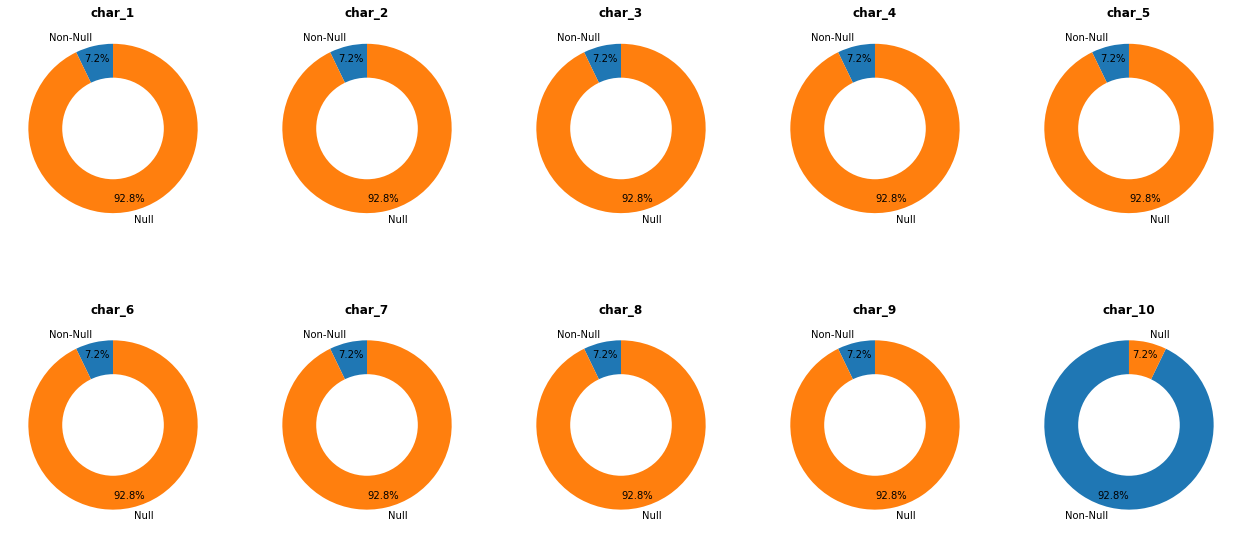

In [10]:
plt.rcParams["figure.figsize"] = (22,10)
a = 0
for i in range(len(df_null.index)):
    if df_null.iloc[[i]]['Null count'][0] != 0:
        a += 1
        labels = ['Non-Null', 'Null']
        sizes = [df_null.iloc[[i]]['Non-Null count'][0], df_null.iloc[[i]]['Null count'][0]]
        plt.subplot(2,5,a)
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        plt.title(df_null.index[i],fontweight="bold")
        #draw circle
        centre_circle = plt.Circle((0,0),0.60,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
plt.show()

In [11]:
df_train1 = df_train.drop(['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6',
                           'char_7', 'char_8', 'char_9'], axis = 1)
df_train1

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0
...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,type 199,1


In [12]:
df_train1.dtypes

people_id            object
activity_id          object
date                 object
activity_category    object
char_10              object
outcome               int64
dtype: object

In [13]:
def convert_str_to_num(x):
    t = x.split(' ')
    return int(t[1])

In [14]:
act_char = ['activity_category']
for i in act_char:
    df_train1[i] = df_train1[i].apply(convert_str_to_num)
df_train1

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,2,type 1,0
...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,4,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,4,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,2,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,4,type 199,1


In [15]:
df_train1.describe()

,activity_category,outcome
count,2.197291e+06,2.197291e+06
mean,2.997433e+00,4.439544e-01
std,1.314068e+00,4.968491e-01
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00
50%,3.000000e+00,0.000000e+00
75%,4.000000e+00,1.000000e+00
max,7.000000e+00,1.000000e+00


In [16]:
df_train1.rename(columns = {"char_10": "activity_char"}, inplace = True)
df_train1

,people_id,activity_id,date,activity_category,activity_char,outcome
0,ppl_100,act2_1734928,2023-08-26,4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,2,type 1,0
...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,4,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,4,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,2,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,4,type 199,1


In [17]:
df_train2 = pd.merge(df_train1, df_people, how = 'left', on = ['people_id'])
df_train2

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,4,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,4,type 418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197287,ppl_99994,act2_4743548,2023-03-30,4,type 1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197288,ppl_99994,act2_536973,2023-01-19,2,type 1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197289,ppl_99994,act2_688656,2023-05-02,4,type 199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95


In [18]:
df_train2['date_x'] = pd.to_datetime(df_train2['date_x'])
df_train2['date_y'] = pd.to_datetime(df_train2['date_y'])

print(type(df_train2['date_x'][0]))
print(type(df_train2['date_y'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df_train2['days_difference'] = (df_train2['date_x'] - df_train2['date_y']).apply(lambda x: x.days)
df_train2

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,2023-08-26,4,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,788
1,ppl_100,act2_2434093,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,455
2,ppl_100,act2_3404049,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,455
3,ppl_100,act2_3651215,2023-08-04,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,766
4,ppl_100,act2_4109017,2023-08-26,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,4,type 418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,161
2197287,ppl_99994,act2_4743548,2023-03-30,4,type 1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,83
2197288,ppl_99994,act2_536973,2023-01-19,2,type 1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,13
2197289,ppl_99994,act2_688656,2023-05-02,4,type 199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,116


In [20]:
type(df_train2['days_difference'][0])

numpy.int64

In [21]:
df_train2.dtypes

people_id                    object
activity_id                  object
date_x               datetime64[ns]
activity_category             int64
activity_char                object
outcome                       int64
char_1                       object
group_1                      object
char_2                       object
date_y               datetime64[ns]
char_3                       object
char_4                       object
char_5                       object
char_6                       object
char_7                       object
char_8                       object
char_9                       object
char_10                        bool
char_11                        bool
char_12                        bool
char_13                        bool
char_14                        bool
char_15                        bool
char_16                        bool
char_17                        bool
char_18                        bool
char_19                        bool
char_20                     

In [22]:
df_train2.any(bool_only = True)

char_10    True
char_11    True
char_12    True
char_13    True
char_14    True
char_15    True
char_16    True
char_17    True
char_18    True
char_19    True
char_20    True
char_21    True
char_22    True
char_23    True
char_24    True
char_25    True
char_26    True
char_27    True
char_28    True
char_29    True
char_30    True
char_31    True
char_32    True
char_33    True
char_34    True
char_35    True
char_36    True
char_37    True
dtype: bool

In [23]:
df_train3 = df_train2.copy()
for i in df_train3.any(bool_only = True).index:
    df_train3[i] = df_train3[i].astype(int)
df_train3

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,2023-08-26,4,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,2022-09-27,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,2023-08-04,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,2023-08-26,2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,4,type 418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,2023-03-30,4,type 1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,2023-01-19,2,type 1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,2023-05-02,4,type 199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [24]:
df_train4 = df_train3.drop(['date_x', 'date_y'], axis = 1)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,4,type 76,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,2,type 1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,2,type 1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,2,type 1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,2,type 1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,4,type 418,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,4,type 1832,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,2,type 1,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,4,type 199,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [25]:
chars = ['char_1','char_2','char_3','char_4','char_5','char_6','char_7','char_8','char_9', 'group_1']
for i in chars:
    df_train4[i] = df_train4[i].apply(convert_str_to_num)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,4,type 76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,4,type 418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,4,type 1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,2,type 1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,4,type 199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [26]:
def convert_str_to_num_(x):
    t = x.split('_')
    return int(float(t[1]))

df_train4["people_id"] = df_train4["people_id"].apply(convert_str_to_num_)

def convert_activity_id_1(x):
    t = x.split('_')
    return int(float(t[0][-1]))

def convert_activity_id_2(x):
    t = x.split('_')
    return int(float(t[1]))

df_train4['activity_id_act'] = df_train4['activity_id'].apply(convert_activity_id_1)
df_train4['activity_id'] = df_train4['activity_id'].apply(convert_activity_id_2)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference,activity_id_act
0,100,1734928,4,type 76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
1,100,2434093,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
2,100,3404049,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
3,100,3651215,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766,2
4,100,4109017,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,99994,4668076,4,type 418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161,2
2197287,99994,4743548,4,type 1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83,2
2197288,99994,536973,2,type 1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13,2
2197289,99994,688656,4,type 199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116,2


In [27]:
df_train4.groupby('activity_char')['activity_char'].agg('count')

activity_char
type 1       904683
type 10         361
type 100        299
type 1000        25
type 1001        15
              ...  
type 994         54
type 995         45
type 997        156
type 998         46
type 999        177
Name: activity_char, Length: 6515, dtype: int64

In [28]:
df_train5 = df_train4.fillna(0)

In [29]:
def convert_str_to_num_ac(x):
    if x == 0:
        return x
    else:
        t = x.split(' ')
        return int(t[1])

df_train5['activity_char'] = df_train5['activity_char'].apply(convert_str_to_num_ac)
df_train5

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference,activity_id_act
0,100,1734928,4,76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
1,100,2434093,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
2,100,3404049,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
3,100,3651215,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766,2
4,100,4109017,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,99994,4668076,4,418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161,2
2197287,99994,4743548,4,1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83,2
2197288,99994,536973,2,1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13,2
2197289,99994,688656,4,199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116,2


In [30]:
df_train5.dtypes

people_id            int64
activity_id          int64
activity_category    int64
activity_char        int64
outcome              int64
char_1               int64
group_1              int64
char_2               int64
char_3               int64
char_4               int64
char_5               int64
char_6               int64
char_7               int64
char_8               int64
char_9               int64
char_10              int64
char_11              int64
char_12              int64
char_13              int64
char_14              int64
char_15              int64
char_16              int64
char_17              int64
char_18              int64
char_19              int64
char_20              int64
char_21              int64
char_22              int64
char_23              int64
char_24              int64
char_25              int64
char_26              int64
char_27              int64
char_28              int64
char_29              int64
char_30              int64
char_31              int64
c

In [43]:
x = df_train5.drop('outcome', axis=1)
y = df_train5.outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
def auc_predict(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr,tpr)
    return auc

auc_predict(model_rfc, x_test, y_test)

0.9927322287100478

In [45]:
joblib.dump(model_rfc, "/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_rfc.joblib")

['/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_rfc.joblib']

In [31]:
df_train4.dtypes

people_id             int64
activity_id           int64
activity_category     int64
activity_char        object
outcome               int64
char_1                int64
group_1               int64
char_2                int64
char_3                int64
char_4                int64
char_5                int64
char_6                int64
char_7                int64
char_8                int64
char_9                int64
char_10               int64
char_11               int64
char_12               int64
char_13               int64
char_14               int64
char_15               int64
char_16               int64
char_17               int64
char_18               int64
char_19               int64
char_20               int64
char_21               int64
char_22               int64
char_23               int64
char_24               int64
char_25               int64
char_26               int64
char_27               int64
char_28               int64
char_29               int64
char_30             

In [32]:
is_NaN = df_train4.isnull()
row_has_NaN = is_NaN.any(axis=1)
df_train5_null = df_train4[row_has_NaN].reset_index()
null_index = np.array(df_train5_null['index'])
df_train5_null = df_train5_null.drop(['index', 'activity_char'], axis=1)
df_train5_null

,people_id,activity_id,activity_category,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference,activity_id_act
0,100025,9923,1,0,2,36096,3,14,6,8,3,9,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,91,1
1,100033,198174,1,0,2,17304,2,10,7,6,3,9,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,100033,214090,1,0,2,17304,2,10,7,6,3,9,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,324,1
3,100033,230588,1,0,2,17304,2,10,7,6,3,9,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217,1
4,100033,271874,1,0,2,17304,2,10,7,6,3,9,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157610,99973,272254,1,0,2,18907,3,8,6,8,1,1,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,50,772,1
157611,99977,204921,1,1,2,8279,3,12,2,8,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,83,0,1
157612,99978,245264,1,1,2,2632,3,6,15,4,1,3,2,9,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,94,0,1
157613,99981,9232,1,0,2,17304,2,5,5,5,2,5,8,8,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,1,3,0,1


In [33]:
df_train5_non_null = df_train4.drop(labels=null_index, axis=0).reset_index()
df_train5_non_null = df_train5_non_null.drop('index', axis=1)
df_train5_non_null['activity_char'] = df_train5_non_null['activity_char'].apply(convert_str_to_num)
df_train5_non_null

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference,activity_id_act
0,100,1734928,4,76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
1,100,2434093,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
2,100,3404049,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455,2
3,100,3651215,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766,2
4,100,4109017,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039671,99994,4668076,4,418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161,2
2039672,99994,4743548,4,1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83,2
2039673,99994,536973,2,1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13,2
2039674,99994,688656,4,199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116,2


## For non-null dataframe

In [34]:
x = df_train5_non_null.drop('outcome', axis=1)
y = df_train5_non_null.outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_non_null = RandomForestClassifier()
model_non_null.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
def auc_predict(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr,tpr)
    return auc

auc_predict(model_non_null, x_test, y_test)

0.9931684773457916

In [36]:
joblib.dump(model_non_null, "/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_non_null.joblib")

['/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_non_null.joblib']

## For null dataframe

In [37]:
x = df_train5_null.drop('outcome', axis=1)
y = df_train5_null.outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_null = RandomForestClassifier()
model_null.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
auc_predict(model_null, x_test, y_test)

0.9584223712522603

In [39]:
joblib.dump(model_null, "/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_null.joblib")

['/content/drive/MyDrive/B.Tech/kaggle/predicting-red-hat-business-value/model_null.joblib']

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,100,act2_1734928,4,type 76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,100,act2_2434093,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,100,act2_3404049,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,100,act2_3651215,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,100,act2_4109017,2,type 1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,99994,act2_4668076,4,type 418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,99994,act2_4743548,4,type 1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,99994,act2_536973,2,type 1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,99994,act2_688656,4,type 199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116
